In [1]:
import serial
from datetime import datetime as dt
import os
import time

uart1 = '/dev/cu.usbserial-14320'
uart2 = '/dev/cu.usbserial-14330'

ser1 = serial.Serial(uart1, baudrate=115200, timeout=0.030);
ser2 = serial.Serial(uart2, baudrate=115200, timeout=0.030);

In [5]:
ser1.flush()
ser2.flush()

while ser1.in_waiting:
    line1 = ser1.read_until(b'\r\n').decode()[:-2]
    
while ser2.in_waiting:
    line2 = ser2.read_until(b'\r\n').decode()[:-2]
    

exp_name = dt.now().strftime('%Y-%m-%d_%H-%M-%S')
print(exp_name)

exp_path = os.path.join('Data', exp_name)
fname1 = exp_path+'_uart1.sole'
fname2 = exp_path+'_uart2.sole'
with open(fname1, 'w+') as f1:
    with open(fname2, 'w+') as f2:
        while True:
            while ser1.in_waiting:
                line1 = (ser1.read_until(b'\r\n')).decode()
                f1.write(line1)
                
            while ser2.in_waiting:
                line2 = (ser2.read_until(b'\r\n')).decode()
                f2.write(line2)
                
            print(line1[:-2] + " " +  line2[:-2], end='               \r')
#             time.sleep(0.05)

2022-12-06_19-41-13


KeyboardInterrupt: 

2022-12-06_19-32-35 - хотьба и бег  
2022-12-06_19-41-13 - хотьба бег хотьба

###### df1

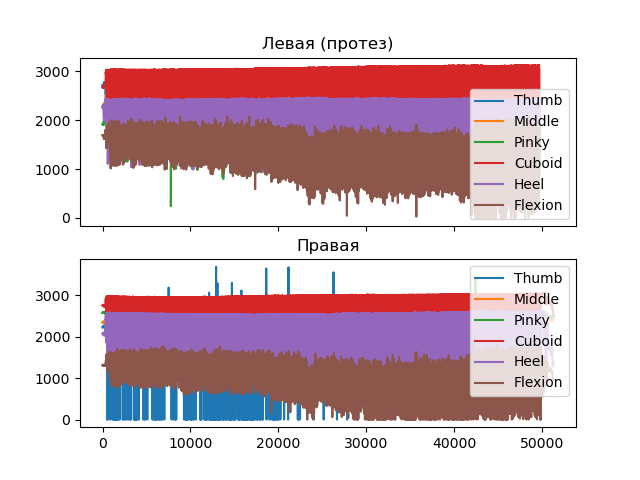

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

df1 = pd.read_csv(fname1, sep = ' ', header=None)[[0,1,2,3,4,9]]\
        .rename(columns=dict(zip([0,1,2,3,4,9], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Flexion'])))\
        .iloc[:]


df2 = pd.read_csv(fname2, sep = ' ', header=None)[[0,1,2,3,4,9]]\
        .rename(columns=dict(zip([0,1,2,3,4,9], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Flexion'])))\
        .iloc[:]

fig, axx = plt.subplots(2,1,sharex=True)

plt.sca(axx[0])
plt.plot(df1)
plt.title('Левая (протез)')
plt.legend(df1.columns)

plt.sca(axx[1])
plt.plot(df2)
plt.title('Правая')
plt.legend(df2.columns)

In [15]:
import mne

In [16]:
import scipy

In [17]:
import numpy as np

Setting up band-pass filter from 0.05 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz)
- Filter length: 4401 samples (66.015 sec)

Setting up band-pass filter from 0.05 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.20 Hz

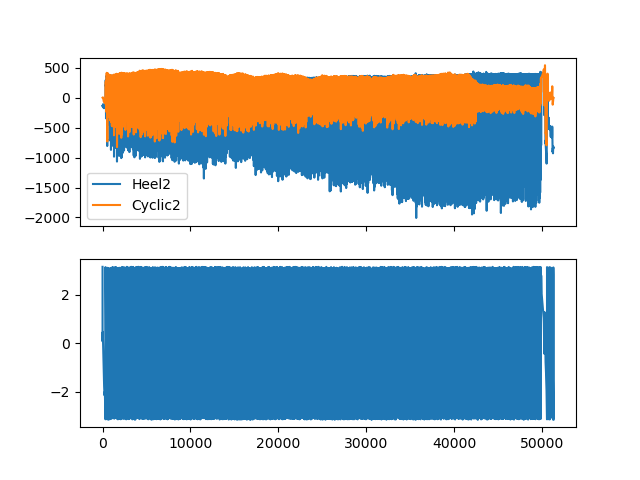

In [18]:
sfreq = 1000/15

cyclic_metric1 = mne.filter.filter_data(df1.Heel.values.reshape(-1).astype(float), sfreq=sfreq, l_freq=0.05, h_freq=0.2)
cyclic_metric2 = mne.filter.filter_data(df2.Heel.values.reshape(-1).astype(float), sfreq=sfreq, l_freq=0.05, h_freq=0.2)

fig, axx = plt.subplots(2,1, sharex=True)
plt.sca(axx[0])
# plt.plot(df1.Heel.values - df1.Heel.mean())
plt.plot(df2.Heel.values - df2.Heel.mean())
# plt.plot(cyclic_metric1)
plt.plot(cyclic_metric2)
# plt.legend(['Heel1', 'Heel2', 'Cyclic1', 'Cyclic2'])
plt.legend(['Heel2', 'Cyclic2'])

plt.sca(axx[1])
analog = scipy.signal.hilbert(cyclic_metric2)
phase = np.arctan2(np.real(analog), np.imag(analog))
plt.plot(phase)

ValueError: x and y must have same first dimension, but have shapes (51318,) and (49702,)

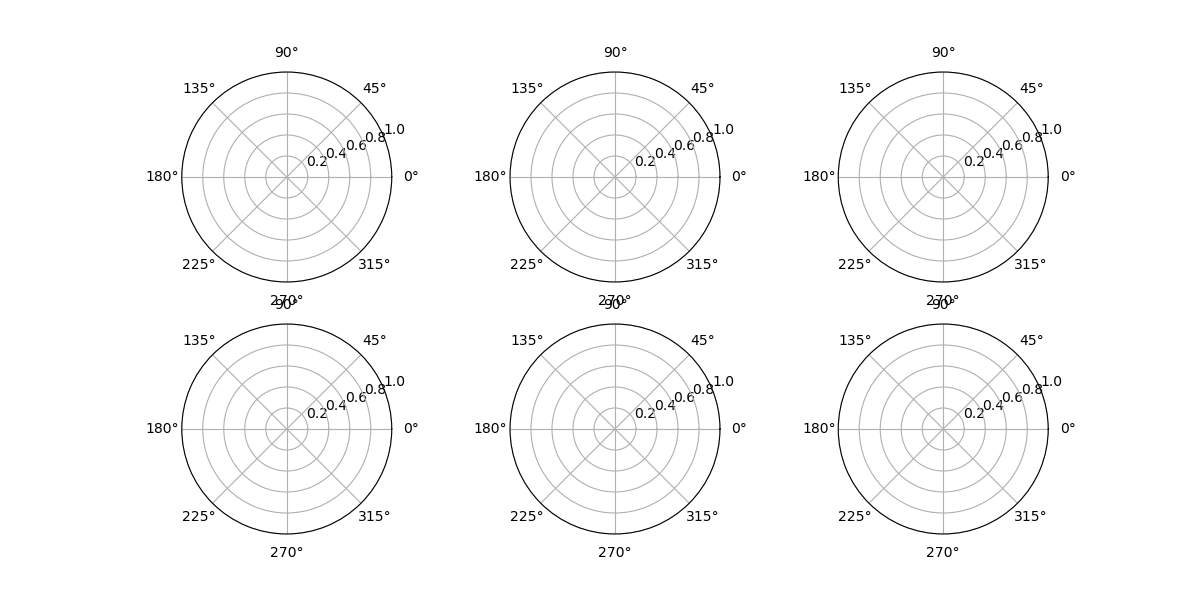

In [19]:
fig, axx = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(12,6))
for i, c in enumerate(df1.columns):
    plt.sca(axx.reshape(-1)[i])
    plt.plot(phase+np.pi, df1[c], alpha=0.7, lw=0.2)
    plt.plot(phase, df2[c], alpha=0.7, lw=0.2)

    plt.title(c)
    
plt.legend(['Left (Prosthesis)', 'Right'], bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()